In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from random import sample
from collections import defaultdict
import pandas as pd
from sklearn.model_selection import GridSearchCV, learning_curve
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import re

In [102]:
from sklearn.model_selection import ShuffleSplit

In [81]:
# learning curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# first data set: digits

In [82]:
data = load_digits()

In [83]:
X, y = data.data, data.target

In [84]:
clf = tree.DecisionTreeClassifier()

In [85]:
clf = clf.fit(data.data, data.target)

[Text(82.26374162946429, 210.645, 'X[36] <= 0.5\nentropy = 0.9\nsamples = 1797\nvalue = [178, 182, 177, 183, 181, 182, 181, 179, 174, 180]'),
 Text(17.935714285714287, 197.055, 'X[28] <= 2.5\nentropy = 0.547\nsamples = 275\nvalue = [174, 0, 4, 1, 6, 25, 5, 0, 3, 57]'),
 Text(6.83265306122449, 183.465, 'X[21] <= 0.5\nentropy = 0.17\nsamples = 188\nvalue = [171, 0, 2, 0, 6, 6, 3, 0, 0, 0]'),
 Text(3.416326530612245, 169.875, 'X[61] <= 0.5\nentropy = 0.719\nsamples = 16\nvalue = [1, 0, 1, 0, 5, 6, 3, 0, 0, 0]'),
 Text(1.7081632653061225, 156.285, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 6, 0, 0, 0, 0]'),
 Text(5.124489795918367, 156.285, 'X[41] <= 5.5\nentropy = 0.64\nsamples = 10\nvalue = [1, 0, 1, 0, 5, 0, 3, 0, 0, 0]'),
 Text(3.416326530612245, 142.695, 'X[10] <= 8.5\nentropy = 0.56\nsamples = 5\nvalue = [1, 0, 1, 0, 0, 0, 3, 0, 0, 0]'),
 Text(1.7081632653061225, 129.10500000000002, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 0, 3, 0, 0, 0]'),
 Text(5.1244897959183

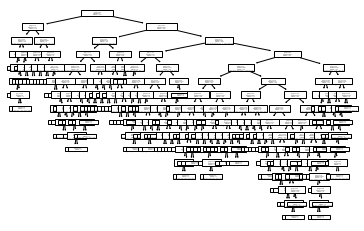

In [8]:
tree.plot_tree(clf)

In [9]:
import graphviz 

In [134]:
clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("digits") 

'digits.pdf'

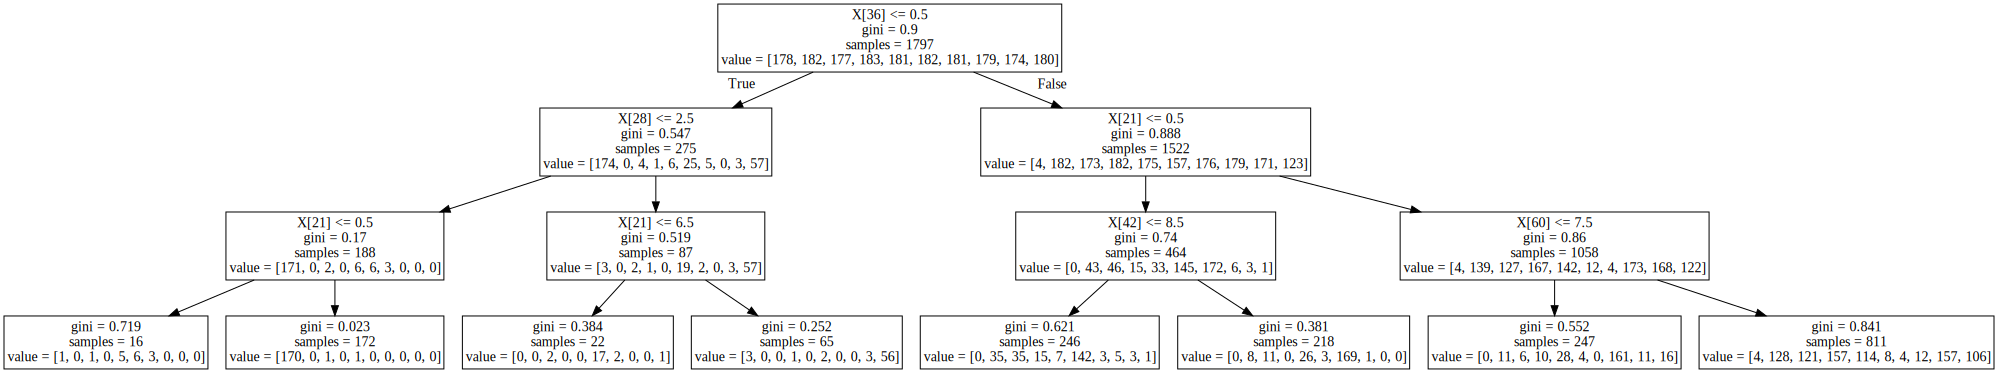

In [135]:
graph

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

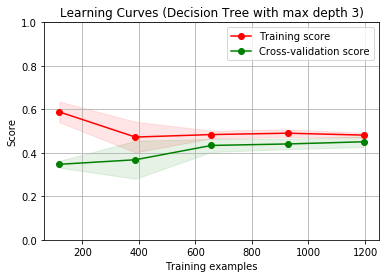

In [73]:
title = r"Learning Curves (Decision Tree with max depth 3)"
est = tree.DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3)
plot_learning_curve(est,title, X, y, ylim=[0,1])

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

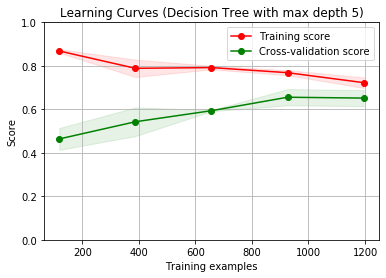

In [72]:
title = r"Learning Curves (Decision Tree with max depth 5)"
est = tree.DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=5)
plot_learning_curve(est,title, X, y, ylim=[0,1])

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

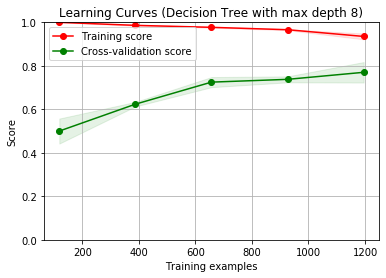

In [71]:
title = r"Learning Curves (Decision Tree with max depth 8)"
est = tree.DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=8)
plot_learning_curve(est,title, X, y, ylim=[0,1])

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

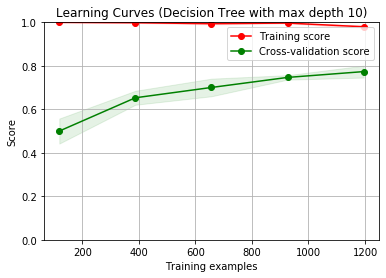

In [70]:
title = r"Learning Curves (Decision Tree with max depth 10)"
est = tree.DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=10)
plot_learning_curve(est,title, X, y, ylim=[0,1])

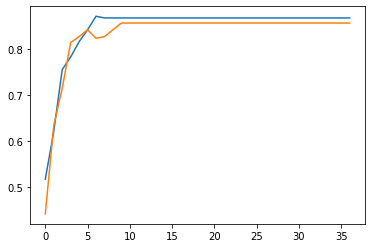

In [131]:
#decision tree learning curve of different function of split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
list1=[]
list2=[]
for depth in range(3,40):
    clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=depth)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_test, test_predict))
    
    clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=depth)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list2)),list2)
plt.plot(range(len(list1)),list1)
plt.show()

In [61]:
#choose tree depth of 5 as optimal solution
clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=5)
clf = clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
print("The prediction accuracy of decision tree is " + str(accuracy_score(y_test, test_predict)))

The prediction accuracy of decision tree is 0.7148148148148148


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

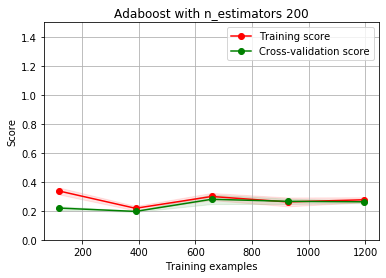

In [76]:
#Boosted DT classifier
title = r"Adaboost with n_estimators 200"
est = AdaBoostClassifier(n_estimators=200)
plot_learning_curve(est,title , X, y, ylim=[0,1.5])

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

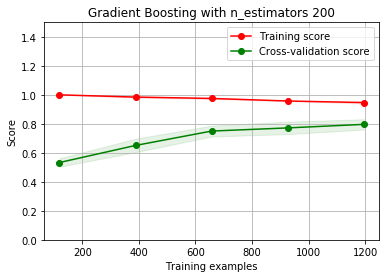

In [78]:
title = r"Gradient Boosting with n_estimators 200"
est = GradientBoostingClassifier(n_estimators=200, learning_rate=0.001, max_depth=5, random_state=0, max_leaf_nodes=10)
plot_learning_curve(est, title, X, y, ylim=[0,1.5])

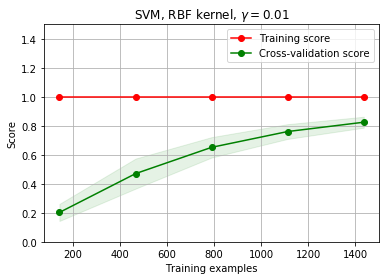

In [106]:
title = r"SVM, RBF kernel, $\gamma=0.01$"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = svm.SVC(C=10, kernel="rbf",gamma=0.01)
plot_learning_curve(estimator, title, X, y, (0., 1.5), cv=cv, n_jobs=4)
plt.show()

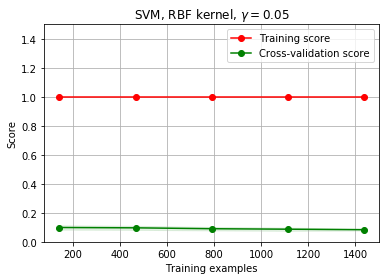

In [107]:
title = r"SVM, RBF kernel, $\gamma=0.05$"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = svm.SVC(C=10, kernel="rbf",gamma=0.05)
plot_learning_curve(estimator, title, X, y, (0., 1.5), cv=cv, n_jobs=4)
plt.show()

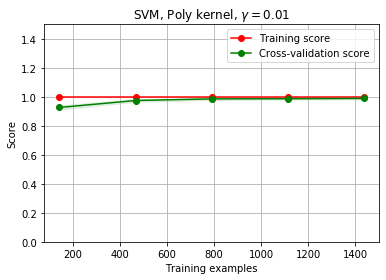

In [109]:
title = r"SVM, Poly kernel, $\gamma=0.01$"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
est = svm.SVC(C=100, kernel="poly",gamma=0.01)
plot_learning_curve(est, title, X, y, (0., 1.5), cv=cv, n_jobs=4)
plt.show()

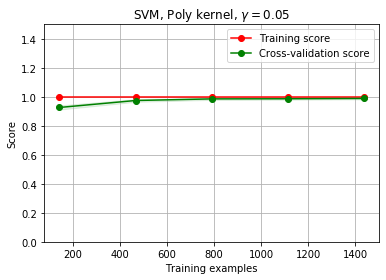

In [110]:
title = r"SVM, Poly kernel, $\gamma=0.05$"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
est = svm.SVC(C=100, kernel="poly",gamma=0.05)
plot_learning_curve(est, title, X, y, (0., 1.5), cv=cv, n_jobs=4)
plt.show()

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

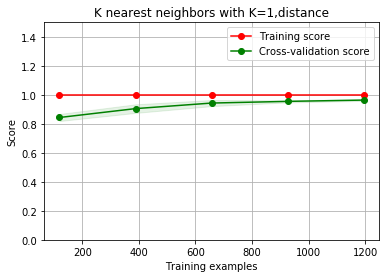

In [128]:
#KNN classifier
title = r"K nearest neighbors with K=1,distance"
est = KNeighborsClassifier(1, weights="distance", p=2)
plot_learning_curve(est, title, X, y, ylim=[0,1.5])



//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

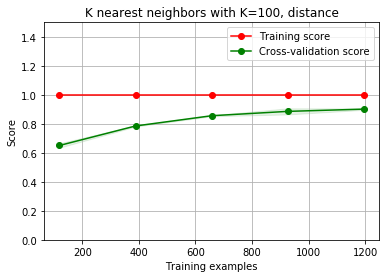

In [127]:
title = r"K nearest neighbors with K=100, distance"
est = KNeighborsClassifier(100, weights="distance", p=2)
plot_learning_curve(est, title, X, y, ylim=[0,1.5])

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

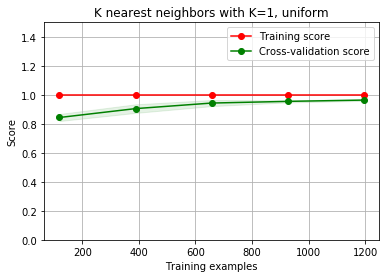

In [125]:
title = r"K nearest neighbors with K=1, uniform"
est = KNeighborsClassifier(1, weights="uniform", p=2)
plot_learning_curve(est, title, X, y, ylim=[0,1.5])

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

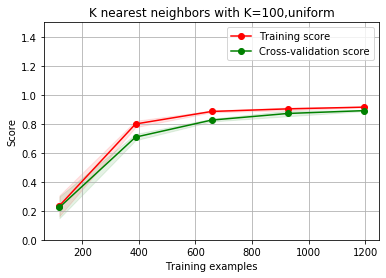

In [126]:
title = r"K nearest neighbors with K=100,uniform"
est = KNeighborsClassifier(100, weights="uniform", p=2)
plot_learning_curve(est, title, X, y, ylim=[0,1.5])

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

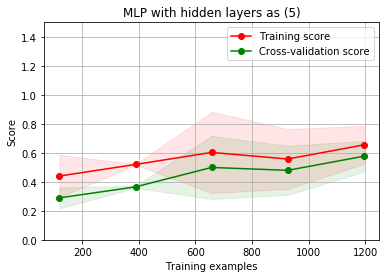

In [74]:
title = r"MLP with hidden layers as (5)"
est = MLPClassifier(hidden_layer_sizes=(5), random_state=0, solver="lbfgs")
plot_learning_curve(est,title, X, y, ylim=[0,1.5])

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

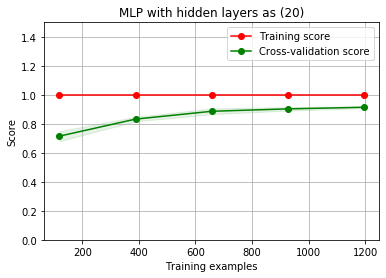

In [75]:
title = r"MLP with hidden layers as (20)"
est = MLPClassifier(hidden_layer_sizes=(20), random_state=0, solver="lbfgs")
plot_learning_curve(est,title, X, y, ylim=[0,1.5])